## Heterocedasticidade

$$Conceito$$

- Variância não constante nos termos de erro

- Heterocedasticidade ocorre quando há emissão de variáveis relevantes para construção do modelo, ou quando a forma do modelo não é adequada.



In [1]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

# Banco de dados 

In [2]:
# Carregando o dataset
dados = pd.read_csv('saeb_rend.csv',encoding='latin1',sep=',')
dados=dados.replace(',', '.')
dados =dados.iloc[:,5:]
dados

,saeb,rendimento
0,5.331833,0.766092
1,NaN,0.910890
2,5.432333,0.884658
3,NaN,NaN
4,5.568833,0.957629
...,...,...
43602,5.458000,0.905575
43603,4.895667,0.882728
43604,5.191667,0.841983
43605,5.157667,0.766156


**Tabela com 43.607 observações e 2 variáveis**

# Dicionário de Dados das variáveis

**$$Variáveis:$$**

**-saeb:** Prova aplicada para saber o nível de desempenho do Estudante

**-rendimento:** Fluxo entre aprovados, não aprovados e abandono escolar do 6° ao 9° ano

    


    


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43607 entries, 0 to 43606
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   saeb        25538 non-null  float64
 1   rendimento  37324 non-null  float64
dtypes: float64(2)
memory usage: 681.5 KB


**Somente dados quantitativos**

In [4]:
#Estatísticas univariadas
dados.describe()

,saeb,rendimento
count,25538.000000,37324.000000
mean,5.047511,0.856967
std,0.753718,0.110447
min,2.053000,0.247282
25%,4.554542,0.791561
50%,5.069500,0.878536
75%,5.551458,0.944761
max,8.588000,1.000000


In [5]:
#Excluir dados faltantes
dados=dados.dropna()
dados

,saeb,rendimento
0,5.331833,0.766092
2,5.432333,0.884658
4,5.568833,0.957629
5,5.152833,0.897852
7,5.608333,0.599606
...,...,...
43600,4.916833,0.706924
43602,5.458000,0.905575
43603,4.895667,0.882728
43604,5.191667,0.841983


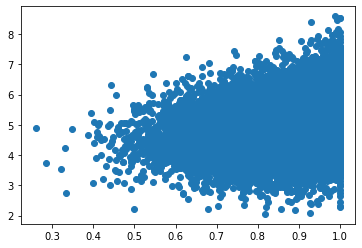

In [6]:
#Grafico da var x e y(formato de cone, conforme vai aumentando o x aumenta a disperçao para o y)
plt.scatter(dados['rendimento'],dados['saeb'],label='Y(X)')

**Quando há heterocedasticidade nos dados, as variáveis tem graficamente formato de cone** 

## Diagnóstico de heterocedasticidade

In [7]:
#Separar as variáveis Explicativas (X) e Preditora(Y)
x = dados['rendimento']
y = dados['saeb']


In [8]:
#Modelo OLS
import statsmodels.api as sm
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo
resultado.summary() # Verificar os dados do modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   saeb   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2126.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:00:35   Log-Likelihood:                -27984.
No. Observations:               25530   AIC:                         5.597e+04
Df Residuals:                   25528   BIC:                         5.599e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2425      0.039     82.277      0.000       3.165       3.320
rendimento     2.0665      0.045     46.111      0.000       1.979       2.154
==============================================================================
Omnibus:                      152.496   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.269
Skew:                          -0.091   Prob(JB):                     1.97e-44
Kurtosis:                       3.395   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**P_valor é estatisticamente significante, porém R² é quase nulo, indicio de heterocedasticidade**

## Teste de Breusch-Pagan para determinar se a heterocedasticidade está presente.

In [9]:
#Previsão do modelo 
dados['y_hat'] = resultado.fittedvalues
dados['y_hat']

0        4.825556
2        5.070567
4        5.221359
5        5.097833
7        4.481521
           ...   
43600    4.703288
43602    5.113792
43603    5.066579
43604    4.982381
43605    4.825688
Name: y_hat, Length: 25530, dtype: float64

In [10]:
#Residuos
dados['Residuos'] = dados.saeb - dados.y_hat
dados['Residuos']

0        0.506278
2        0.361767
4        0.347474
5        0.055000
7        1.126812
           ...   
43600    0.213545
43602    0.344208
43603   -0.170913
43604    0.209286
43605    0.331978
Name: Residuos, Length: 25530, dtype: float64

In [11]:
# Up
n = dados.shape[0]
erro  = dados['Residuos']

dados['up'] = (erro**2)/((sum(erro**2))/(n))
dados['up']

0        0.488848
2        0.249605
4        0.230272
5        0.005769
7        2.421583
           ...   
43600    0.086971
43602    0.225964
43603    0.055711
43604    0.083536
43605    0.210192
Name: up, Length: 25530, dtype: float64

## Modelo OLS para detectar heterocedasticidade

In [12]:
x = dados['y_hat']
y = dados['up']

In [13]:
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo
resultado.summary() # Verificar os dados do modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     up   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.97
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           0.000186
Time:                        15:00:35   Log-Likelihood:                -47370.
No. Observations:               25530   AIC:                         9.474e+04
Df Residuals:                   25528   BIC:                         9.476e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1258      0.234      0.537      0.591      -0.333       0.585
y_hat          0.1732      0.046      3.737      0.000       0.082       0.264
==============================================================================
Omnibus:                    19495.847   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458715.921
Skew:                           3.521   Prob(JB):                         0.00
Kurtosis:                      22.535   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Soma dos quadrados do modelo
resultado.mse_model

33.44140065192187

## Teste chi²

H0 do teste: ausência de heterocedasticidade. > 0.05
    
H1 do teste: heterocedasticidade, correlação entre resíduos com uma ou mais variáveis explicativas, o que indica omissão de variável relevante! <0.05

In [15]:
#Teste chi²
from scipy import stats

gl = 1 #Graus de liberdade
p = 1-stats.chi2.cdf(resultado.mse_model/2, gl)
print(f'P_values = {p}')


P_values = 4.330589278600527e-05


**P-values < 0.05, rejeita-se a hipótese nula, há correlação entre os resíduos com a variável explicativa, o termo de erro está fazendo as vezes das variáveis faltantes**

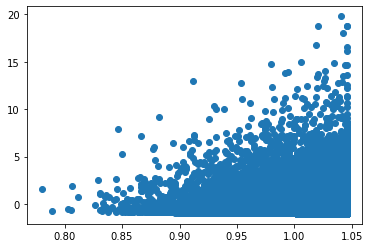

In [16]:
#Grafico dos termos de erro com o y_hat
plt.scatter(resultado.fittedvalues,resultado.resid,label='Y(X)')

## Algoritimo para o Teste de Breusch-Pagan 

In [17]:
#Separar as variáveis Explicativas (X) e Preditora(Y)
x = dados['rendimento']
y = dados['saeb']


#Modelo OLS
import statsmodels.api as sm
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo

#Algoritimo do Teste de Breusch-Pagan 
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(resultado.resid, resultado.model.exog,robust=False)
lzip(names, test)

[('Lagrange multiplier statistic', 16.720700325953658),
 ('p-value', 4.3305892786206156e-05),
 ('f-value', 13.966877252943384),
 ('f p-value', 0.00018646528832487542)]

**Com o algoritimo de Breusch-Pagan, deve-se usar os resíduos da variável explicativa contra variável target junto com a variável explicativa**

## Adicionar outra variável e testar a heterocedasticidade novamente

In [18]:
# Carregando o dataset
dados = pd.read_csv('saeb_rend.csv',encoding='latin1',sep=',')
dados=dados.replace(',', '.')
dados =dados[['uf','rendimento','saeb']]

#Excluir dados faltantes
dados=dados.dropna()
dados

,uf,rendimento,saeb
0,RO,0.766092,5.331833
2,RO,0.884658,5.432333
4,RO,0.957629,5.568833
5,RO,0.897852,5.152833
7,RO,0.599606,5.608333
...,...,...,...
43600,DF,0.706924,4.916833
43602,DF,0.905575,5.458000
43603,DF,0.882728,4.895667
43604,DF,0.841983,5.191667


**Tabela com 25.530 observações e 3 variáveis**

In [19]:
# Criar variaveis dummys para varariável UF
dummies = pd.get_dummies(dados['uf'])

#Drop var dummy
dummies = dummies.drop('SP',axis=1)
dummies

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PI,PR,RJ,RN,RO,RR,RS,SC,SE,TO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43602,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43603,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43604,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Na regressao linear devemos usar uma variável qualitativa como intercepto e para que isso aconteça devemos criar N-1 dummies**

In [20]:
#Unindo os 2 datasets(var target com as dummies)
dados1 = pd.merge(dados, dummies, left_index=True,right_index=True)

#Excluindo a variável uf que foi dummiezada
dados1  = dados1.drop('uf',axis=1)
dados1

,rendimento,saeb,AC,AL,AM,AP,BA,CE,DF,ES,...,PI,PR,RJ,RN,RO,RR,RS,SC,SE,TO
0,0.766092,5.331833,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.884658,5.432333,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.957629,5.568833,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.897852,5.152833,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0.599606,5.608333,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,0.706924,4.916833,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
43602,0.905575,5.458000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
43603,0.882728,4.895667,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
43604,0.841983,5.191667,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Tabela com 25.530 observações e 28 variáveis**

## Criar o modelo OLS

In [21]:
#Separar as variáveis X e Y

col = dados1.columns

#Variável x
x = dados1[col].drop('saeb',axis=1)

#Variável y
y= dados1['saeb']

In [22]:
#Modelo OlS

modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado3 = modelo.fit() # Treinar o modelo
resultado3.summary() # Verificar os dados do modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   saeb   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     497.5
Date:                Mon, 28 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:00:35   Log-Likelihood:                -23604.
No. Observations:               25530   AIC:                         4.726e+04
Df Residuals:                   25502   BIC:                         4.749e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1937      0.043     96.607      0.000       4.109       4.279
rendimento     1.2444      0.044     28.057      0.000       1.157       1.331
AC            -0.4371      0.059     -7.448      0.000      -0.552      -0.322
AL            -0.6051      0.032    -19.040      0.000      -0.667      -0.543
AM            -0.6851      0.027    -25.180      0.000      -0.738      -0.632
AP            -0.9728      0.071    -13.694      0.000      -1.112      -0.834
BA            -0.6823      0.019    -35.401      0.000      -0.720      -0.644
CE            -0.0780      0.017     -4.568      0.000      -0.111      -0.045
DF             0.0054      0.059      0.093      0.926      -0.110       0.121
ES             0.1472      0.029      5.087      0.000       0.090       0.204
GO             0.0564      0.022      2.517      0.012       0.012       0.100
MA            -1.1074      0.020    -56.413      0.000      -1.146      -1.069
MG            -0.0388      0.016     -2.421      0.015      -0.070      -0.007
MS             0.1014      0.035      2.889      0.004       0.033       0.170
MT            -0.5207      0.030    -17.443      0.000      -0.579      -0.462
PA            -0.8999      0.021    -42.020      0.000      -0.942      -0.858
PB            -0.5284      0.029    -18.298      0.000      -0.585      -0.472
PE            -0.4650      0.021    -21.877      0.000      -0.507      -0.423
PI            -0.5455      0.024    -22.289      0.000      -0.593      -0.498
PR             0.1759      0.022      8.093      0.000       0.133       0.219
RJ            -0.0426      0.021     -2.004      0.045      -0.084      -0.001
RN            -0.5367      0.036    -14.790      0.000      -0.608      -0.466
RO            -0.0490      0.037     -1.323      0.186      -0.122       0.024
RR            -0.7258      0.089     -8.174      0.000      -0.900      -0.552
RS             0.2775      0.019     14.766      0.000       0.241       0.314
SC             0.2558      0.021     12.228      0.000       0.215       0.297
SE            -0.4444      0.036    -12.407      0.000      -0.515      -0.374
TO            -0.3182      0.035     -9.002      0.000      -0.388      -0.249
==============================================================================
Omnibus:                      575.254   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1122.751
Skew:                           0.147   Prob(JB):                    1.58e-244
Kurtosis:                       3.984   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Note que teve um aumento no valor do R²**

## Teste de Breusch-Pagan para determinar se a heterocedasticidade está presente.

## Calcular sem usar algoritimo

In [23]:
#Previsão do modelo 
dados1['y_hat'] = resultado3.fittedvalues

#Residuos
dados1['Residuos'] = dados1.saeb - dados1.y_hat

# Up
n = dados1.shape[0]
erro1  = dados1['Residuos']

dados1['up'] = (erro1**2)/((sum(erro1**2))/(n))

## Modelo OLS para detectar heterocedasticidade
x = dados1['y_hat']
y = dados1['up']

#Modelo OLS
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo
resultado.summary() # Verificar os dados do modelo


#Teste chi²
gl = 1 #Graus de liberdade
p = 1-stats.chi2.cdf(resultado.mse_model/2, gl)
print(f'P_values = {p}')



P_values = 0.2996785211023768


**P_value > 0.05, portanto as variáveis do modelo são Homocedastica**

# Erro

In [26]:
#Algoritimo do Teste de Breusch-Pagan 
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(resultado3.resid, resultado3.model.exog,robust=False)
lzip(names, test)

[('Lagrange multiplier statistic', 773.6754396593387),
 ('p-value', 1.3295846964953088e-145),
 ('f-value', 19.581362018345303),
 ('f p-value', 2.1149830134752455e-93)]

In [27]:
#Algoritimo do Teste de Breusch-Pagan 
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(resultado3.resid, resultado3.model.exog,robust=True)
lzip(names, test)

[('Lagrange multiplier statistic', 518.5273667392006),
 ('p-value', 2.3079283855837512e-92),
 ('f-value', 19.581362018345445),
 ('f p-value', 2.1149830134724804e-93)]

**Valores Errados**